In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import time
import random
import pickle as pkl
import scipy as sp
from scipy.integrate import cumulative_trapezoid
from craterdata import *
%matplotlib inline

In [2]:
N = 10
area = 2500
area2 = 10000
dmin = 1
pf = npf_new
cf_inv = ncf_inv

lambda_rv = true_error_pdf(N)
crater_density_rv = lambda_rv / area
N1_shift = pf(1) / pf(dmin)
N1_rv = crater_density_rv * N1_shift
age_rv = apply2rv(N1_rv, cf_inv)
m16_age_rv = N1_rv.scale(cf_inv)

N1_ap_rv = m16_age_rv.apply(ncf)
crater_density_ap_rv = N1_ap_rv / N1_shift
lambda_ap_rv = crater_density_ap_rv * area
X = np.linspace(0, 4, 10000)
P = 0.0 * X + 1.0
uniform_rv = RandomVariable(X, P, kind='median')
N1_ua_rv = uniform_rv.apply(ncf)
cd_ua_rv = N1_ua_rv / N1_shift
lambda_ua_rv = cd_ua_rv * area

X = np.linspace(0, 2, 10000)
P = norm.pdf(X, 1, npf_error(0.5))
N1_shift_rv = RandomVariable(X, P)
N1_pfe_rv = crater_density_rv * N1_shift_rv
age_pfe_rv = N1_pfe_rv.apply(ncf_inv)

def revive_box():
    ax.spines['top'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(True)
    plt.yticks([])

letter_count = 0
def config_plot(
    xlim, ylim=[-0.07, 1.5], letter='a', tick_top=False,
    xlabel=r'$\lambda$', letter_y_shift=0
):
    global letter_count
    plt.ylim(ylim)
    revive_box()
    ltr = chr(ord('a') + letter_count)
    letter_count += 1
    plt.text(
        xlim[0] + 0.02 * (xlim[1] - xlim[0]), 
        ylim[1] - 0.1 + letter_y_shift, 
        ltr, ha='left', va='top', size=20
    )
    if tick_top:
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        plt.xlabel(xlabel, labelpad=4)
        ax.tick_params(axis='x', pad=0)
    else:
        plt.xlabel(xlabel, labelpad=0)
        ax.tick_params(axis='x', pad=2)

def gamma_PDF_step(
    letter='a', c=cs[1], lambda_rv=lambda_rv, letter_y_shift=0,
    kind='median', tick_top=False, mf=False
):
    xlim = [3, 23]
    lambda_rv.plot(
        label=True, xlim=xlim, error_bar_type=kind,
        color=c, label_y=1.0, mf=mf,
        force_label_side='right'
    )
    config_plot(
        xlim, xlabel=r'Model Crater Count $\lambda$', 
        letter=letter, letter_y_shift=letter_y_shift, tick_top=tick_top
    )

def crater_density_step(
    letter='c', kind='median', c=cs[7], mf=False,
    crater_density_rv=crater_density_rv, tick_top=False
):
    xlim = [1E-3, 9E-3]
    crater_density_rv.plot(
        label=True, xlim=xlim, unit=r'km$^{-2}$',
        rounding_n=2, color=c, label_y=1.0, mf=mf,
        force_label_side='right', error_bar_type=kind
    )
    config_plot(
        xlim, letter=letter, xlabel=r'Crater Density (km$^{-2}$)',
        tick_top=tick_top
    )

def N1_step(
    letter='d', kind='median', c=cs[10], N1_rv=N1_rv, 
    tick_top=False, mf=False
):
    xlim=[1E-3, 9E-3]
    N1_rv.plot(
        label=True, rounding_n=2, xlim=xlim, mf=mf,
        unit=r'km$^{-2}$', color=c, label_y=1.0,
        force_label_side='right', error_bar_type=kind
    )
    config_plot(
        xlim, letter=letter, xlabel=r'N(1) (km$^{-2}$)',
        tick_top=tick_top
    )
    
def age_step(
    letter='e', age_rv=age_rv, kind='median', c=cs[4], 
    tick_top=False, mf=False
):
    xlim=[2.9, 3.7]
    age_rv.plot(
        label=True, unit='Ga', mf=mf,
        xlim=xlim, color=c, label_y=1.0,
        force_label_side='right', error_bar_type=kind
    )
    config_plot(
        xlim, letter=letter, xlabel='Age (Ga)',
        tick_top=tick_top
    )


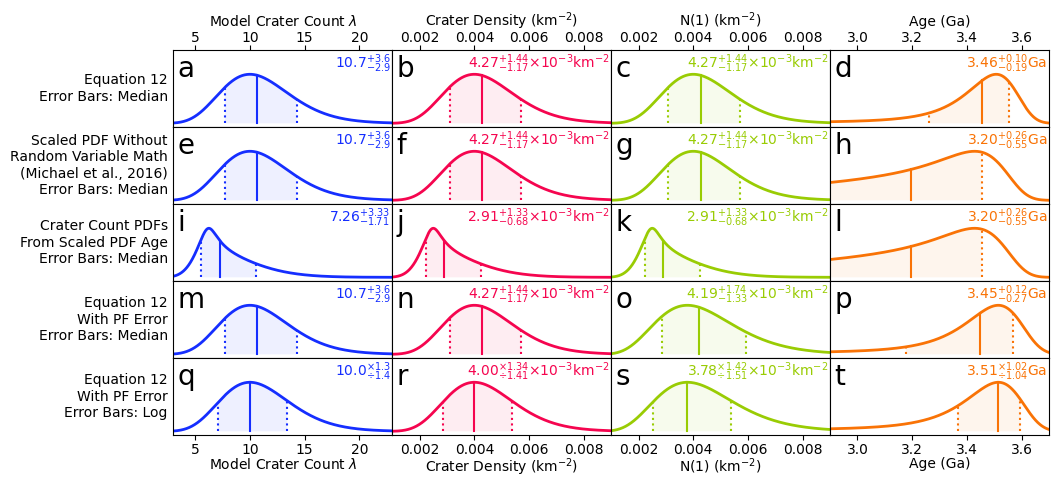

In [3]:
fig = plt.figure(figsize=(11.3, 5.0))
gs = gridspec.GridSpec(5, 4, figure=fig)
letter_count = 0

ax = plt.subplot(gs[0, 0])
gamma_PDF_step(tick_top=True)
ylabel = 'Equation 12\nError Bars: Median'
plt.ylabel(ylabel, rotation=0, ha='right', va='center')

ax = plt.subplot(gs[0, 1])
crater_density_step(tick_top=True)

ax = plt.subplot(gs[0, 2])
N1_step(tick_top=True)

ax = plt.subplot(gs[0, 3])
age_step(tick_top=True)

ax = plt.subplot(gs[1, 0])
gamma_PDF_step()
ylabel = (
    'Scaled PDF Without\nRandom Variable Math\n'
    '(Michael et al., 2016)\nError Bars: Median'
)
plt.ylabel(ylabel, rotation=0, ha='right', va='center')

ax = plt.subplot(gs[1, 1])
crater_density_step()

ax = plt.subplot(gs[1, 2])
N1_step()

ax = plt.subplot(gs[1, 3])
age_step(age_rv=m16_age_rv)

ax = plt.subplot(gs[2, 0])
gamma_PDF_step(lambda_rv=lambda_ap_rv)
ylabel = 'Crater Count PDFs\nFrom Scaled PDF Age\nError Bars: Median'
plt.ylabel(ylabel, rotation=0, ha='right', va='center')

ax = plt.subplot(gs[2, 1])
crater_density_step(crater_density_rv=crater_density_ap_rv)

ax = plt.subplot(gs[2, 2])
N1_step(N1_rv=N1_ap_rv)

ax = plt.subplot(gs[2, 3])
age_step(age_rv=m16_age_rv)

ax = plt.subplot(gs[3, 0])
gamma_PDF_step()
ylabel = 'Equation 12\nWith PF Error\nError Bars: Median'
plt.ylabel(ylabel, rotation=0, ha='right', va='center')

ax = plt.subplot(gs[3, 1])
crater_density_step()

ax = plt.subplot(gs[3, 2])
N1_step(N1_rv=N1_pfe_rv)

ax = plt.subplot(gs[3, 3])
age_step(age_rv=age_pfe_rv)

ax = plt.subplot(gs[4, 0])
gamma_PDF_step(kind='log', mf=True)
ylabel = 'Equation 12\nWith PF Error\nError Bars: Log'
plt.ylabel(ylabel, rotation=0, ha='right', va='center')

ax = plt.subplot(gs[4, 1])
crater_density_step(kind='log', mf=True)

ax = plt.subplot(gs[4, 2])
N1_step(N1_rv=N1_pfe_rv, kind='log', mf=True)

ax = plt.subplot(gs[4, 3])
age_step(age_rv=age_pfe_rv, kind='log', mf=True)

plt.subplots_adjust(wspace=0, hspace=0)
pfig = plt.gcf()
pfig.savefig('figs/age_example.pdf', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

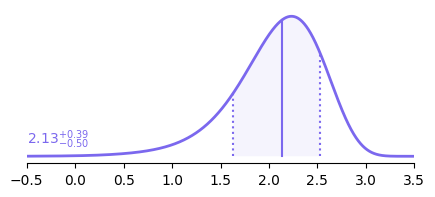

In [4]:
delta_age_rv = age_pdf(N, area, dmin) - age_pdf(N, area2, dmin)

delta_age_rv.plot(
    label=True, error_bar_type='median', xlim=[-0.5, 3.5]
)
plt.gcf().savefig(
    'figs/age_examples_subtraction.pdf', bbox_inches='tight'
)